# week 3
## Gradient Descent and optimization
### part 3: compare performance with mini batch gradient descent

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import load_iris

In [3]:
# lead and preprocess the iris dataset
iris = load_iris()
X = iris.data # Features
y = iris.target.reshape(-1, 1) # Labels reshaped for OneHotEncoder

In [4]:
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y) # One-hot encode labels
scaler = StandardScaler()
X = scaler.fit_transform(X) # Standardize features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# define activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)

In [6]:
# define th MLP class with mini batch gradient descent
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, epochs=1000,
    batch_size=1):

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size

        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        error = y - output
        d_output = error * sigmoid_derivative(output)
        error_hidden = np.dot(d_output, self.W2.T)
        d_hidden = error_hidden * sigmoid_derivative(self.a1)

        # Update weights and biases
        self.W2 += np.dot(self.a1.T, d_output) * self.learning_rate
        self.b2 += np.sum(d_output, axis=0, keepdims=True) * self.learning_rate
        self.W1 += np.dot(X.T, d_hidden) * self.learning_rate
        self.b1 += np.sum(d_hidden, axis=0, keepdims=True) * self.learning_rate

        return np.mean(np.abs(error))

    def train(self, X, y):
        self.losses = []
        for epoch in range(self.epochs):
            indices = np.random.permutation(X.shape[0])
            X_shuffled, y_shuffled = X[indices], y[indices]

            for i in range(0, X.shape[0], self.batch_size): # Mini-batch processing
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]
                output = self.forward(X_batch)
                loss = self.backward(X_batch, y_batch, output)

            self.losses.append(loss)
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss:.4f}')

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

Experimenting with SGD - Learning Rate: 0.01, Batch Size: 1
Epoch 0, Loss: 0.6043
Epoch 100, Loss: 0.2477
Epoch 200, Loss: 0.2863
Epoch 300, Loss: 0.2005
Epoch 400, Loss: 0.0590
Epoch 500, Loss: 0.0864
Epoch 600, Loss: 0.0869
Epoch 700, Loss: 0.0754
Epoch 800, Loss: 0.0518
Epoch 900, Loss: 0.0594
Experimenting with Mini-Batch GD - Learning Rate: 0.01, Batch Size: 1
Epoch 0, Loss: 0.6551
Epoch 100, Loss: 0.1140
Epoch 200, Loss: 0.1972
Epoch 300, Loss: 0.1294
Epoch 400, Loss: 0.1010
Epoch 500, Loss: 0.1829
Epoch 600, Loss: 0.0463
Epoch 700, Loss: 0.1236
Epoch 800, Loss: 0.0376
Epoch 900, Loss: 0.0343
Experimenting with SGD - Learning Rate: 0.01, Batch Size: 8
Epoch 0, Loss: 0.6822
Epoch 100, Loss: 0.3573
Epoch 200, Loss: 0.0858
Epoch 300, Loss: 0.0664
Epoch 400, Loss: 0.1665
Epoch 500, Loss: 0.0474
Epoch 600, Loss: 0.0590
Epoch 700, Loss: 0.0366
Epoch 800, Loss: 0.0336
Epoch 900, Loss: 0.0300
Experimenting with Mini-Batch GD - Learning Rate: 0.01, Batch Size: 8
Epoch 0, Loss: 0.4969
Epoc

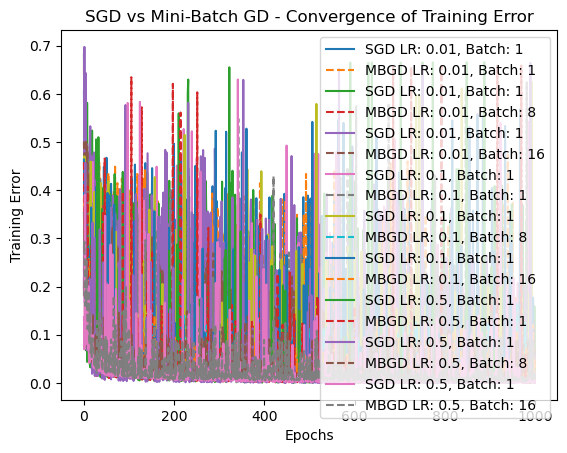

In [7]:
# experiment with mini batch gradient descent
learning_rates = [0.01, 0.1, 0.5]
batch_sizes = [1, 8, 16]

sgd_results = {}
mbgd_results = {}

for lr in learning_rates:
    for batch_size in batch_sizes:
        print(f'Experimenting with SGD - Learning Rate: {lr}, Batch Size: {batch_size}')
        mlp_sgd = MLP(input_size=4, hidden_size=5, output_size=3, learning_rate=lr, epochs=1000,batch_size=1) # SGD
        mlp_sgd.train(X_train, y_train)
        sgd_results[(lr, batch_size)] = mlp_sgd.losses

        print(f'Experimenting with Mini-Batch GD - Learning Rate: {lr}, Batch Size: {batch_size}')
        mlp_mbgd = MLP(input_size=4, hidden_size=5, output_size=3, learning_rate=lr, epochs=1000,
        batch_size=batch_size) # Mini-Batch GD
        mlp_mbgd.train(X_train, y_train)
        mbgd_results[(lr, batch_size)] = mlp_mbgd.losses

        plt.plot(mlp_sgd.losses, label=f'SGD LR: {lr}, Batch: 1')
        plt.plot(mlp_mbgd.losses, label=f'MBGD LR: {lr}, Batch: {batch_size}', linestyle='dashed')

plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.title('SGD vs Mini-Batch GD - Convergence of Training Error')
plt.legend()
plt.show()

In [8]:
# evaluate the model
predictions = mlp_mbgd.predict(X_test)
y_test_labels = np.argmax(y_test, axis=1)
accuracy = np.mean(predictions == y_test_labels)
print(f'Test Accuracy with Mini-Batch GD (LR: {lr}, Batch Size: {batch_size}) -&gt; {accuracy * 100:.2f}')

Test Accuracy with Mini-Batch GD (LR: 0.5, Batch Size: 16) -&gt; 100.00
